# **Using Graph Neural Networks (GNNs) for Personalized Offers in the Insurance Industry**


### **Introduction**
In the dynamic landscape of the insurance industry, providing personalized offers to customers is paramount. Tailoring offers based on individual preferences, risk profiles, and historical behaviors can significantly enhance customer satisfaction and drive business growth. However, the complexities of insurance data, which often involve intricate relationships among customers, policies, and other factors, pose challenges for traditional analytical approaches.
This notebook presents a comprehensive exploration of leveraging Graph Neural Networks (GNNs) to address the challenges of making personalized offers in the insurance industry. GNNs are powerful deep learning models designed to capture intricate patterns and dependencies within graph-structured data. By treating customers, policies, and other entities as nodes in a graph, we can harness GNNs to uncover hidden insights that can drive the creation of effective personalized offers.

### **Problem Statement**
The primary challenge the insurance industry faces is the need to provide personalized offers that resonate with individual customers. Conventional methods often struggle to capture the interdependencies and non-linear relationships present in insurance data. Furthermore, the sheer volume of data and the variety of factors influencing customer behavior make it difficult to create accurate and relevant offers.
### **Proposed Solution**
The proposed solution is to explore the application of Graph Neural Networks (GNNs) to tackle the challenges of generating personalized offers in the insurance industry. GNNs offer a unique advantage in capturing complex relationships and patterns within graph-structured data. By constructing a graph where nodes represent customers, policies, and other relevant entities, and edges represent interactions and relationships, we can empower the GNN to learn meaningful representations of the data.
## Our research will involve the following key steps:

- **Data Collection:** We will gather a comprehensive dataset from the insurance industry that includes information about customers, policies, historical behaviors, preferences, and outcomes.

- **Data Preprocessing:** The collected data will undergo preprocessing to handle missing values, normalize features, and construct the graph structure.

- **Graph Neural Network Model:** We will design and implement a Graph Neural Network architecture tailored to the insurance domain. The model will be trained to capture intricate patterns and relationships within the constructed graph.

- **Personalized Offer Generation:** Once the GNN is trained, we will use it to analyze customer data and generate personalized offers based on individual preferences, risk profiles, and historical behaviors.

- **Comparative Analysis:** To assess the effectiveness of the GNN-based personalized offer generation system, we will compare its performance with traditional machine learning models such as XGBoost and Logistic Regression.



By the end of this research, we aim to demonstrate the potential of GNNs in revolutionizing personalized offers within the insurance sector. Our goal is to contribute to the advancement of data-driven strategies that drive customer engagement, retention, and satisfaction in the insurance industry.


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os, re, random
import xgboost as xgb


!pip install torch-geometric

# imports
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
from torch_geometric.transforms import RandomNodeSplit as masking
from torch_geometric.utils.convert import to_networkx
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GraphConv

# from torch_geometric.transforms import AddTrainValTestMask as masking

# class RandomNodeSplit(
# split: str = 'train_rest',
# num_splits: int = 1,
# num_train_per_class: int = 20,
# num_val: Union[int, float] = 500,
# num_test: Union[int, float] = 1000,
# key: Optional[str] = 'y')



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from tensorflow.keras.utils import to_categorical
import networkx as nx

!pip install scikit-plot
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=592376e69bae51e7118a3ea448bb7eca028a72e17b0b8ae86e36a2fea5e9b0ad
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [ ]:
#upload data from harddisk
from google.colab import files
uploaded = files.upload()

Saving insurance dataset1.csv to insurance dataset1.csv


In [ ]:
#read data
data=pd.read_csv("insurance dataset1.csv")
data

,Unnamed: 0,ID,checkwin,health,anychronic,currentsmoker,high_util,NUM_SUM,impatient_sum,gambling_risk,...,yr2healthstatus,yr2planselection,yr1winnings,yr2winnings,yraveragewinnings,losscon,nudgecon,nudgecon_det,yr1optimal,yr2optimal
0,0,704.0,98.895,Execellent/Very Good/Good,1.0,NO,0.0,0.0,0.0,0.000000,...,Well,Plan A,98.92,98.87,9889.5,lose,1.0,2.0,1.0,1.0
1,1,704.0,57.325,Execellent/Very Good/Good,1.0,NO,0.0,0.0,0.0,0.000000,...,Sick,Plan A,78.92,35.73,5732.5,win,1.0,2.0,1.0,0.0
2,2,703.0,88.895,Execellent/Very Good/Good,0.0,NO,0.0,0.0,4.0,0.000000,...,Sick,Plan A,98.92,78.87,8889.5,lose,1.0,2.0,1.0,1.0
3,3,703.0,88.895,Execellent/Very Good/Good,0.0,NO,0.0,0.0,4.0,0.000000,...,Sick,Plan A,98.92,78.87,8889.5,win,1.0,2.0,1.0,1.0
4,4,702.0,98.895,Fair/Poor,1.0,NO,0.0,1.0,2.0,0.000000,...,Well,Plan A,98.92,98.87,9889.5,lose,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1301,32.0,98.895,Execellent/Very Good/Good,1.0,Everyday/Some Days,1.0,0.0,3.0,0.333333,...,Well,Plan A,98.92,98.87,9889.5,lose,1.0,3.0,1.0,1.0
1302,1302,32.0,98.895,Execellent/Very Good/Good,1.0,Everyday/Some Days,1.0,0.0,3.0,0.333333,...,Well,Plan A,98.92,98.87,9889.5,win,1.0,3.0,1.0,1.0
1303,1303,40.0,64.450,Fair/Poor,1.0,Everyday/Some Days,0.0,0.0,2.0,1.333333,...,Sick,Plan F,73.05,55.85,6445.0,lose,0.0,0.0,0.0,0.0
1304,1304,40.0,67.385,Fair/Poor,1.0,Everyday/Some Days,0.0,0.0,2.0,1.333333,...,Sick,Plan F,78.92,55.85,6738.5,lose,0.0,0.0,1.0,0.0


In [ ]:
# number of rows and columns
data.shape

(1306, 31)

In [ ]:
#drop the unnamed column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# check the data types present
data.dtypes

ID                     float64
checkwin               float64
health                  object
anychronic             float64
currentsmoker           object
high_util              float64
NUM_SUM                float64
impatient_sum          float64
gambling_risk          float64
investing_risk         float64
health_risk            float64
healthinsurancecomp    float64
NoInsurance            float64
FamilyPlanEmployer     float64
Individual             float64
Medicare               float64
Medicaid               float64
shop_exchange1          object
yr1healthstatus         object
yr1planselection        object
yr2healthstatus         object
yr2planselection        object
yr1winnings            float64
yr2winnings            float64
yraveragewinnings      float64
losscon                 object
nudgecon               float64
nudgecon_det           float64
yr1optimal             float64
yr2optimal             float64
dtype: object

In [ ]:
# check the data that is not numerical to view how it looks like
data.select_dtypes(include=['object'])

,health,currentsmoker,shop_exchange1,yr1healthstatus,yr1planselection,yr2healthstatus,yr2planselection,losscon
0,Execellent/Very Good/Good,NO,no,Well,Plan A,Well,Plan A,lose
1,Execellent/Very Good/Good,NO,no,Sick,Plan A,Sick,Plan A,win
2,Execellent/Very Good/Good,NO,no,Well,Plan A,Sick,Plan A,lose
3,Execellent/Very Good/Good,NO,no,Well,Plan A,Sick,Plan A,win
4,Fair/Poor,NO,no,Well,Plan A,Well,Plan A,lose
...,...,...,...,...,...,...,...,...
1301,Execellent/Very Good/Good,Everyday/Some Days,no,Well,Plan A,Well,Plan A,lose
1302,Execellent/Very Good/Good,Everyday/Some Days,no,Well,Plan A,Well,Plan A,win
1303,Fair/Poor,Everyday/Some Days,no,Sick,I don't want to buy health insurance this year,Sick,Plan F,lose
1304,Fair/Poor,Everyday/Some Days,no,Sick,Plan A,Sick,Plan F,lose


In [ ]:
CATEGORICAL_COLS = data.select_dtypes(include=['object']).columns

In [ ]:
# check the number of uniques in each case
for val in data.select_dtypes(include=['object']).columns:
    print(f"col  {val}  has {data[val].nunique()} unique counts")

col  health  has 2 unique counts
col  currentsmoker  has 2 unique counts
col  shop_exchange1  has 2 unique counts
col  yr1healthstatus  has 2 unique counts
col  yr1planselection  has 7 unique counts
col  yr2healthstatus  has 2 unique counts
col  yr2planselection  has 7 unique counts
col  losscon  has 2 unique counts


In [ ]:
#checking nun value
data.isna().sum()

ID                     0
checkwin               0
health                 0
anychronic             0
currentsmoker          0
high_util              0
NUM_SUM                0
impatient_sum          0
gambling_risk          0
investing_risk         0
health_risk            0
healthinsurancecomp    0
NoInsurance            0
FamilyPlanEmployer     0
Individual             0
Medicare               0
Medicaid               0
shop_exchange1         0
yr1healthstatus        0
yr1planselection       0
yr2healthstatus        0
yr2planselection       0
yr1winnings            0
yr2winnings            0
yraveragewinnings      6
losscon                0
nudgecon               0
nudgecon_det           0
yr1optimal             0
yr2optimal             0
dtype: int64

In [ ]:
# fill na by mean values
data.fillna(data.mean(), inplace=True)

<Axes: >

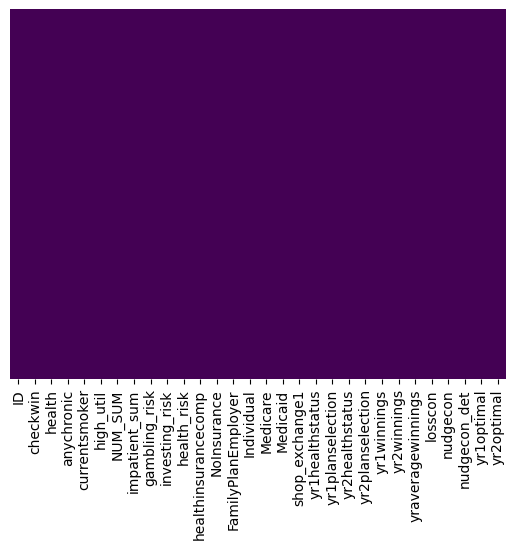

In [ ]:
#checking nan values in heatmap
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# check summary stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1306.0,359.211485,201.073766,1.000,188.250000,360.000000,534.750000,704.000000
checkwin,1306.0,83.464521,14.918778,36.525,68.435000,88.400000,96.466250,98.895000
anychronic,1306.0,0.421899,0.494052,0.000,0.000000,0.000000,1.000000,1.000000
high_util,1306.0,0.372894,0.483760,0.000,0.000000,0.000000,1.000000,1.000000
NUM_SUM,1306.0,0.537519,0.800700,0.000,0.000000,0.000000,1.000000,3.000000
impatient_sum,1306.0,2.071210,1.436891,0.000,1.000000,2.000000,3.000000,4.000000
gambling_risk,1306.0,0.479837,0.996192,0.000,0.000000,0.000000,0.333333,6.000000
investing_risk,1306.0,2.419347,1.551446,0.000,1.333333,2.333333,3.666667,6.000000
health_risk,1306.0,1.218819,0.989299,0.000,0.444444,1.000000,1.777778,5.777778
healthinsurancecomp,1306.0,1.994640,1.100666,0.000,1.000000,2.000000,3.000000,4.000000


In [ ]:
#Change ALL the colummns value to Numerical
mapping = {'Execellent/Very Good/Good': 1,'Fair/Poor': 0,'NO':1,'Everyday/Some Days':0,'Well':1,'Sick':0,"I don't want to buy health insurance this year":0,'Plan A':1,'Plan B':2,'Plan C':3,'Plan D':4,'Plan E':5,'Plan F':6,}
data.replace(mapping, inplace=True)
data

,ID,checkwin,health,anychronic,currentsmoker,high_util,NUM_SUM,impatient_sum,gambling_risk,investing_risk,...,yr2healthstatus,yr2planselection,yr1winnings,yr2winnings,yraveragewinnings,losscon,nudgecon,nudgecon_det,yr1optimal,yr2optimal
0,704.0,98.895,1,1.0,1,0.0,0.0,0.0,0.000000,0.000000,...,1,1,98.92,98.87,9889.5,lose,1.0,2.0,1.0,1.0
1,704.0,57.325,1,1.0,1,0.0,0.0,0.0,0.000000,0.000000,...,0,1,78.92,35.73,5732.5,win,1.0,2.0,1.0,0.0
2,703.0,88.895,1,0.0,1,0.0,0.0,4.0,0.000000,0.666667,...,0,1,98.92,78.87,8889.5,lose,1.0,2.0,1.0,1.0
3,703.0,88.895,1,0.0,1,0.0,0.0,4.0,0.000000,0.666667,...,0,1,98.92,78.87,8889.5,win,1.0,2.0,1.0,1.0
4,702.0,98.895,0,1.0,1,0.0,1.0,2.0,0.000000,3.000000,...,1,1,98.92,98.87,9889.5,lose,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,32.0,98.895,1,1.0,0,1.0,0.0,3.0,0.333333,1.000000,...,1,1,98.92,98.87,9889.5,lose,1.0,3.0,1.0,1.0
1302,32.0,98.895,1,1.0,0,1.0,0.0,3.0,0.333333,1.000000,...,1,1,98.92,98.87,9889.5,win,1.0,3.0,1.0,1.0
1303,40.0,64.450,0,1.0,0,0.0,0.0,2.0,1.333333,0.000000,...,0,6,73.05,55.85,6445.0,lose,0.0,0.0,0.0,0.0
1304,40.0,67.385,0,1.0,0,0.0,0.0,2.0,1.333333,0.000000,...,0,6,78.92,55.85,6738.5,lose,0.0,0.0,1.0,0.0


### Explanatory Data Analysis.
- This will help gain some insights from the dataset.
- The target variable here is `losscon` which tries to indicate if the insurance given in a win or a lose.  A win means that the insurance is favourable to both the insurer and the insured.
- Below are some analysis from the collected data which is prelabelled
- Which plan will be better in which condition will be shown

In [ ]:
# first rename losscon to target
data.rename({"losscon":"target"}, inplace=True, axis=1)

In [ ]:
data.target.value_counts()

lose    657
win     649
Name: target, dtype: int64

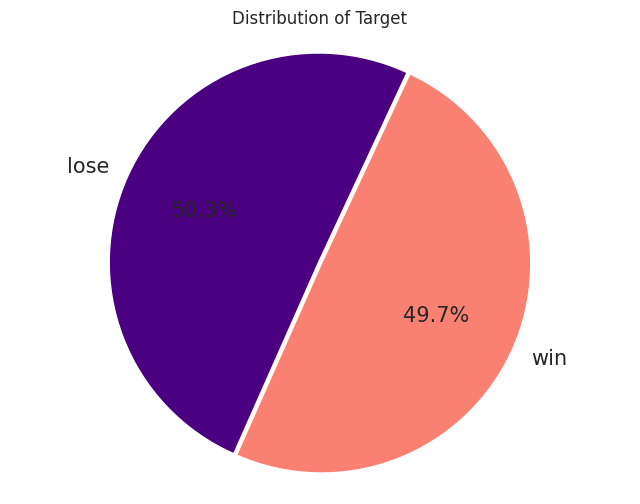

In [ ]:
# plot the percentage of target dist
sns.set(style="white")
label_counts = data['target'].value_counts()
# draw the chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%', startangle=65,
       colors = ['indigo','salmon'],
        explode = [0,0.015], textprops = {"fontsize":15})
plt.title("Distribution of Target")
plt.axis('equal')
plt.show()

In [ ]:
data.sample(2)

,ID,checkwin,health,anychronic,currentsmoker,high_util,NUM_SUM,impatient_sum,gambling_risk,investing_risk,...,yr2healthstatus,yr2planselection,yr1winnings,yr2winnings,yraveragewinnings,target,nudgecon,nudgecon_det,yr1optimal,yr2optimal
379,506.0,78.235,1,0.0,1,0.0,1.0,0.0,0.333333,1.0,...,0,5,88.52,67.95,7823.5,lose,1.0,3.0,0.0,0.0
894,237.0,81.675,1,1.0,0,1.0,0.0,2.0,0.666667,3.0,...,0,4,88.52,74.83,8167.5,win,1.0,1.0,0.0,0.0


In [ ]:
# change the TARGET to numerical
data['label'] = data['target'].map({"win":1,"lose":0})

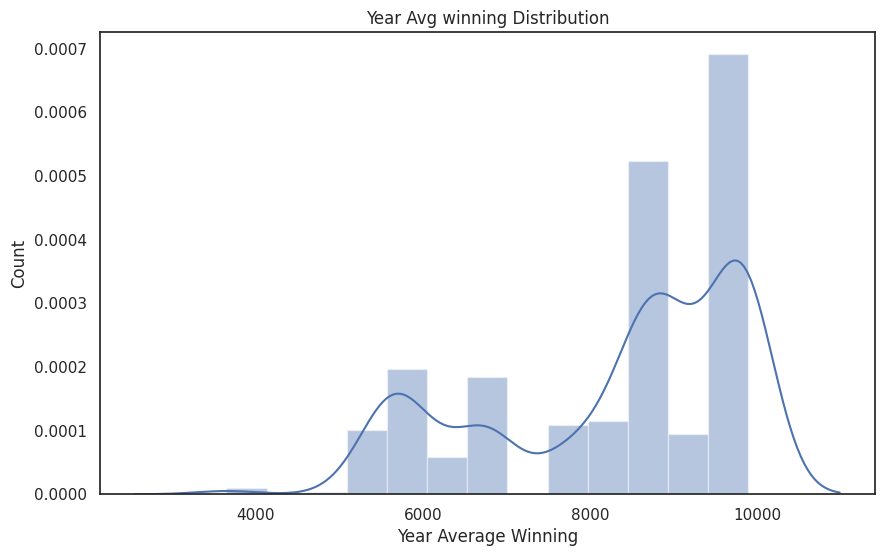

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(data.yraveragewinnings)
plt.title("Year Avg winning Distribution")
plt.xlabel("Year Average Winning")
plt.ylabel("Count")
plt.show()

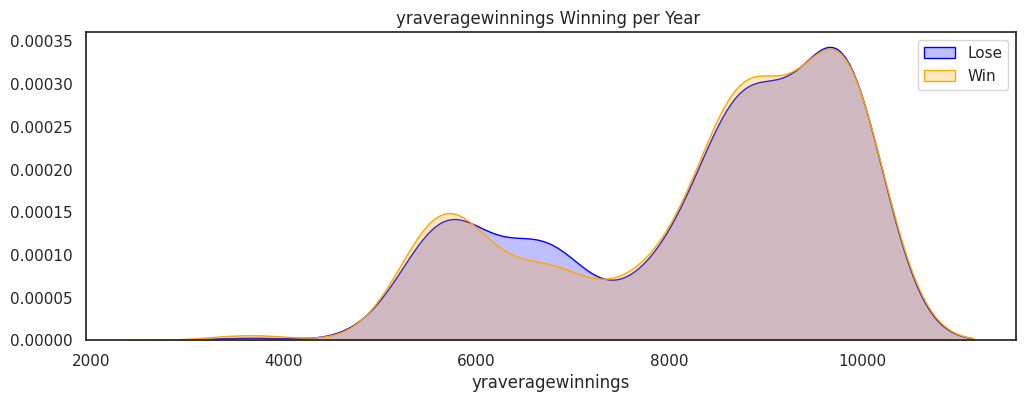

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(data.loc[(data['label'] == 0), 'yraveragewinnings'], label = 'Lose', shade = True, color='blue')
sns.kdeplot(data.loc[(data['label'] == 1), 'yraveragewinnings'], label = 'Win', shade = True, color='orange')
plt.title("yraveragewinnings Winning per Year ")
plt.ylabel('')
plt.legend()
plt.show()

<Axes: >

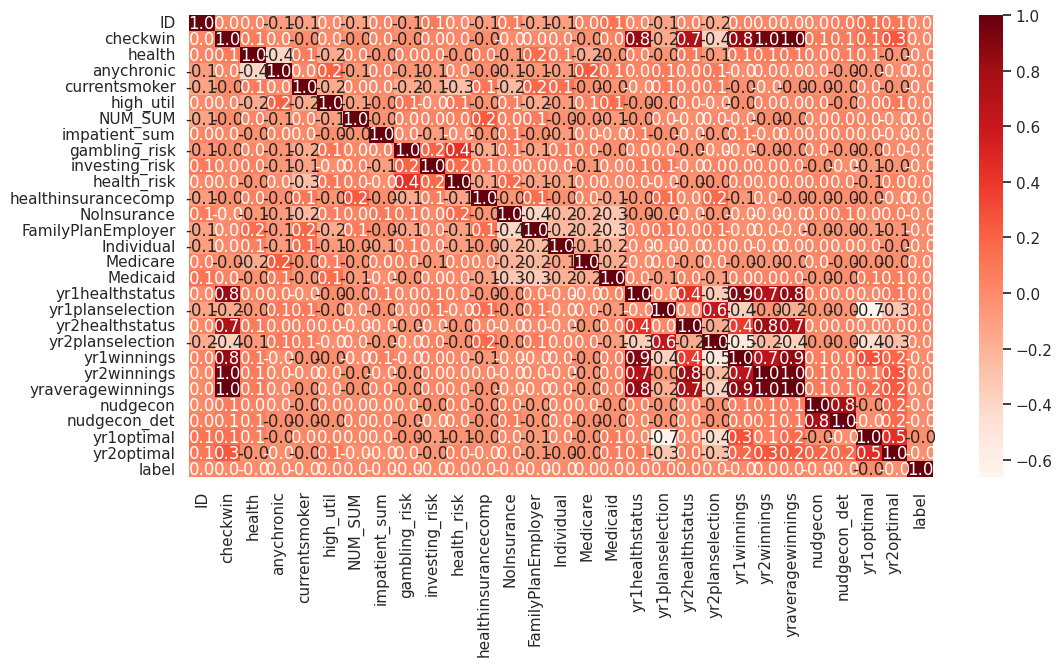

In [ ]:
#showing the posibility if the insurance given in a win or a lose.
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,cbar=True,square=False,fmt='.1f',annot=True,cmap='Reds')

In [ ]:
# create limit groups for year average winnings
data['bin_avg_winnings'] = pd.cut(data['yraveragewinnings'],[3500, 4500, 5500, 6500, 7500, 9000, 10500])

In [ ]:
print(data['bin_avg_winnings'].value_counts(normalize=True))

(9000, 10500]    0.375957
(7500, 9000]     0.359112
(5500, 6500]     0.138591
(6500, 7500]     0.088055
(4500, 5500]     0.033691
(3500, 4500]     0.004594
Name: bin_avg_winnings, dtype: float64


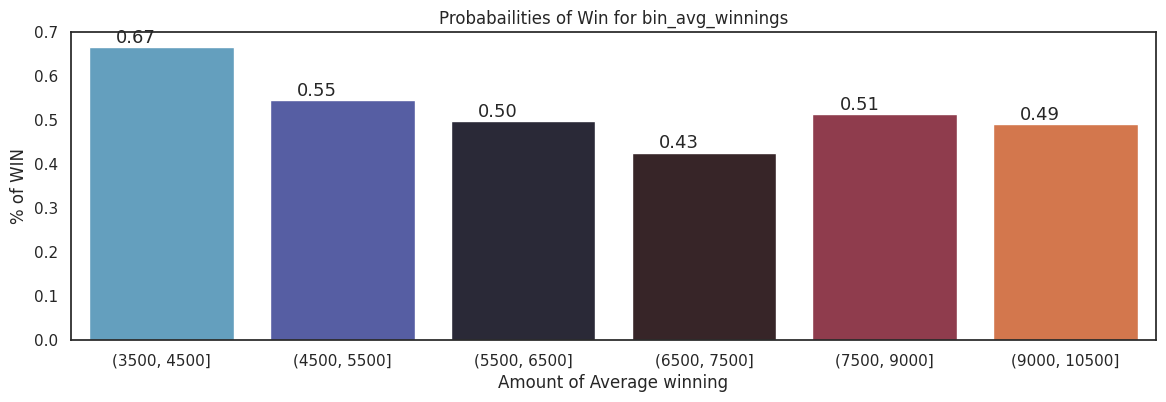

In [ ]:
# plot probs of win/lose if you are in the group
data['bin_avg_winnings'] = data['bin_avg_winnings'].astype(str)
plt.figure(figsize=(14,4))
ax = sns.barplot(
    x = "bin_avg_winnings",
    y = "label",
    data = data,
    palette = 'icefire',
    ci = None,
    order =  ['(3500, 4500]', '(4500, 5500]', '(5500, 6500]', '(6500, 7500]',
                '(7500, 9000]', '(9000, 10500]'])
plt.xlabel("Amount of Average winning", fontsize= 12)
plt.ylabel("% of WIN", fontsize= 12)
plt.title("Probabailities of Win for bin_avg_winnings")
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01),fontsize=13)
plt.show()

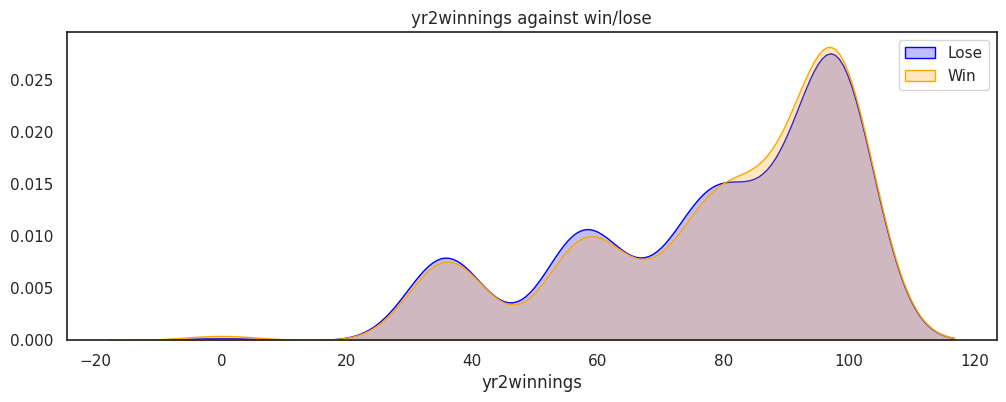

In [ ]:
#year 2
plt.figure(figsize=(12,4))
sns.kdeplot(data.loc[(data['label'] == 0), 'yr2winnings'], label = 'Lose', shade = True, color='blue')
sns.kdeplot(data.loc[(data['label'] == 1), 'yr2winnings'], label = 'Win', shade = True, color='orange')
plt.title("yr2winnings against win/lose")
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#maximum winings and minimum winings
print(data.yr2winnings.max(),data.yr2winnings.min())
data['year2_winnings'] = pd.cut(data['yr2winnings'],[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype(str)

98.87 0.0


In [ ]:
data.year2_winnings.value_counts()

(90, 100]    531
(70, 80]     231
(50, 60]     184
(30, 40]     156
(80, 90]     147
(60, 70]      51
(-1, 10]       6
Name: year2_winnings, dtype: int64

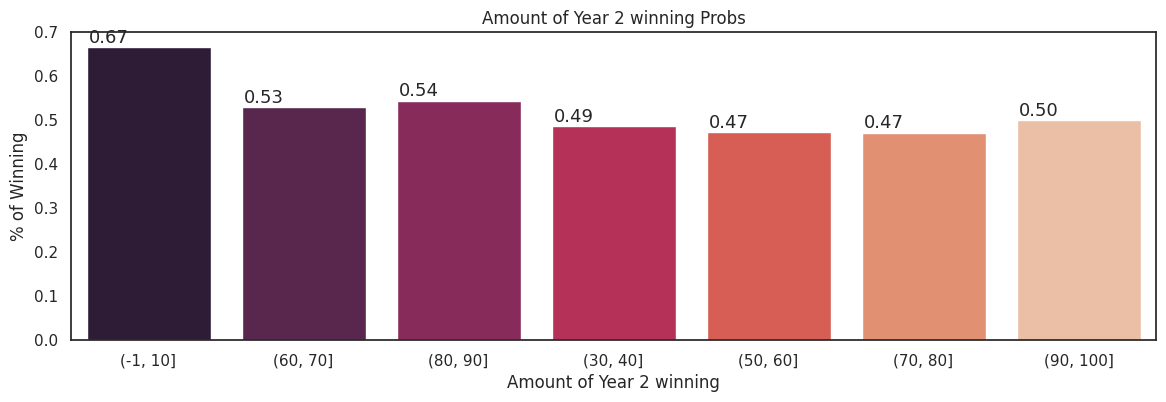

In [ ]:
plt.figure(figsize=(14,4))
ax = sns.barplot(
    x = "year2_winnings",
    y = "label",
    data = data,
    palette = 'rocket',
    ci = None,
    order =  ['(-1, 10]', '(60, 70]', '(80, 90]', '(30, 40]',
                '(50, 60]', '(70, 80]', '(90, 100]'])
plt.xlabel("Amount of Year 2 winning", fontsize= 12)
plt.ylabel("% of Winning", fontsize= 12)
plt.title("Amount of Year 2 winning Probs")
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.015, p.get_height()+0.01),fontsize=13)
plt.show()

In [ ]:
# year 1 winning
print(data.yr1winnings.max(), data.yr1winnings.min())
data['year1_winnings'] = pd.cut(data['yr1winnings'],[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype(str)

98.92 66.52


In [ ]:
data['year1_winnings'].value_counts()

(90, 100]    680
(70, 80]     342
(80, 90]     186
(60, 70]      98
Name: year1_winnings, dtype: int64

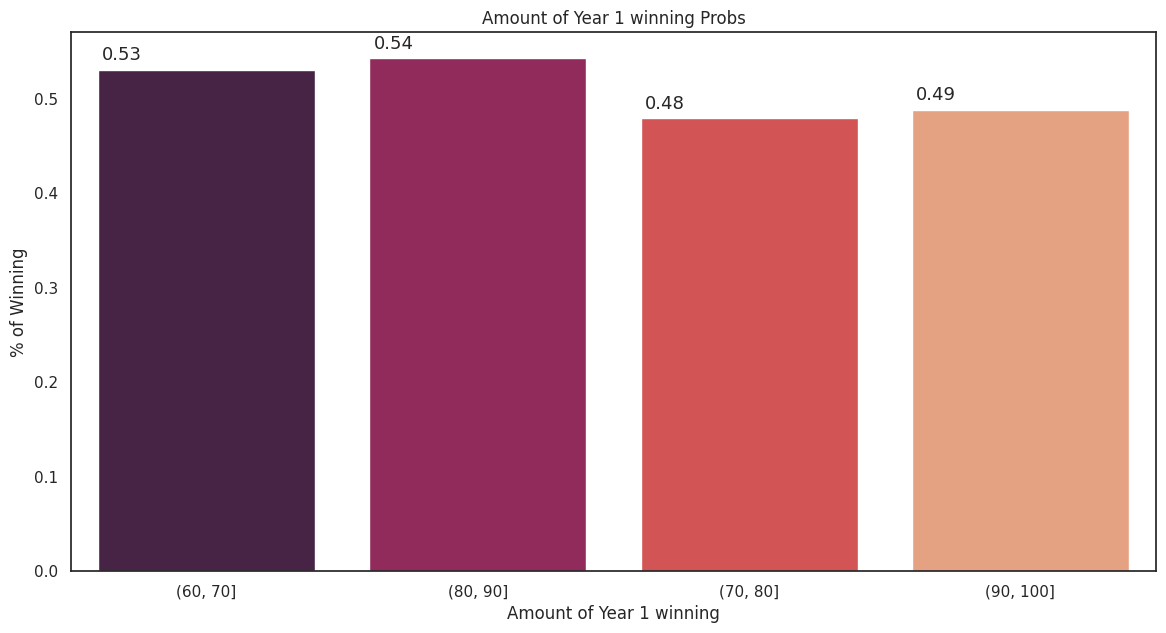

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.barplot(
    x = "year1_winnings",
    y = "label",
    data = data,
    palette = 'rocket',
    ci = None,
    order =  ['(60, 70]',
                '(80, 90]', '(70, 80]', '(90, 100]'])
plt.xlabel("Amount of Year 1 winning", fontsize= 12)
plt.ylabel("% of Winning", fontsize= 12)
plt.title("Amount of Year 1 winning Probs")
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.015, p.get_height()+0.01),fontsize=13)
plt.show()

In [ ]:
# for check win
data.checkwin.max(), data.checkwin.min()

(98.895, 36.525)

In [ ]:
data['checkwin_groups'] = pd.cut(data['checkwin'],[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype(str)
# check the groups
data.checkwin_groups.value_counts()

(90, 100]    491
(80, 90]     401
(60, 70]     184
(50, 60]     156
(70, 80]      68
(30, 40]       6
Name: checkwin_groups, dtype: int64

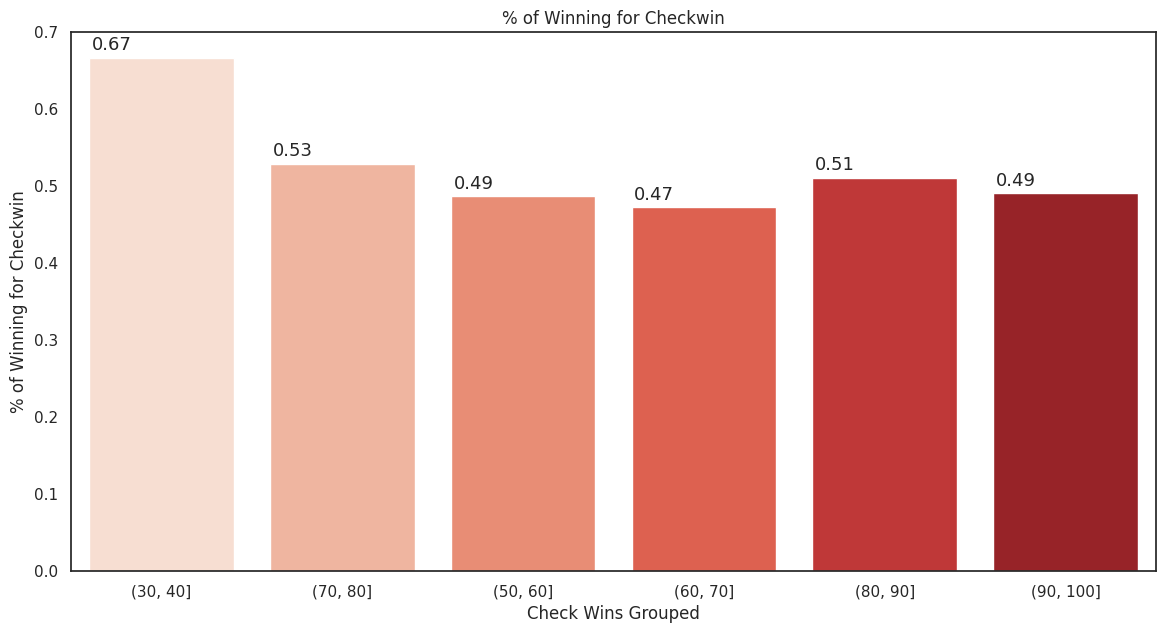

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.barplot(
    x = "checkwin_groups",
    y = "label",
    data = data,
    palette = 'Reds',
    ci = None,
    order =  ['(30, 40]','(70, 80]','(50, 60]', '(60, 70]','(80, 90]', '(90, 100]'])
plt.xlabel("Check Wins Grouped", fontsize= 12)
plt.ylabel("% of Winning for Checkwin", fontsize= 12)
plt.title("% of Winning for Checkwin")
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.015, p.get_height()+0.01),fontsize=13)
plt.show()

In [ ]:
plan_a = data[data['yr2planselection']==1]
plan_b = data[data['yr2planselection']==2]
plan_c = data[data['yr2planselection']==3]
plan_d = data[data['yr2planselection']==4]
plan_e = data[data['yr2planselection']==5]
plan_f = data[data['yr2planselection']==6]
no_plan =data[data['yr2planselection']==0]

<Axes: xlabel='ID', ylabel='Count'>

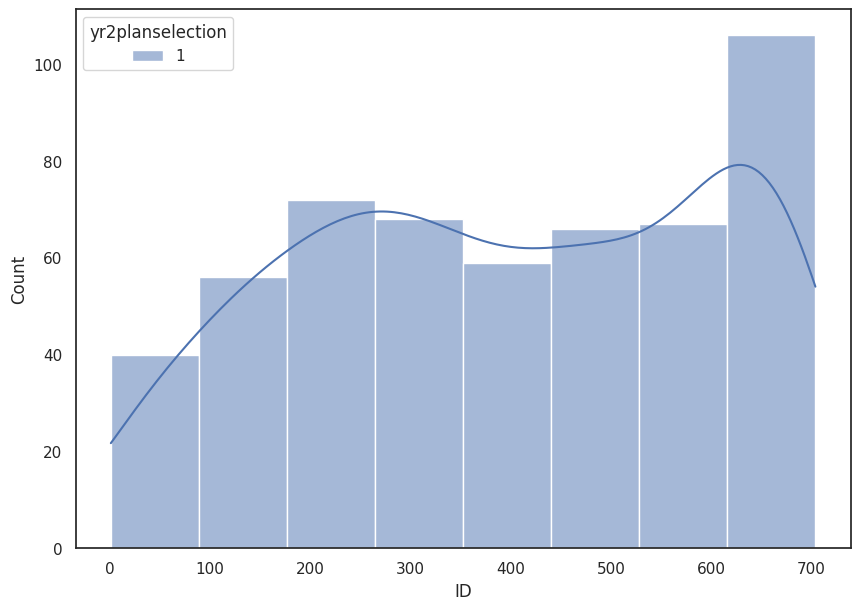

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_a,x='ID',hue="yr2planselection",kde=True,multiple='stack',bins=8,)

<Axes: xlabel='ID', ylabel='Count'>

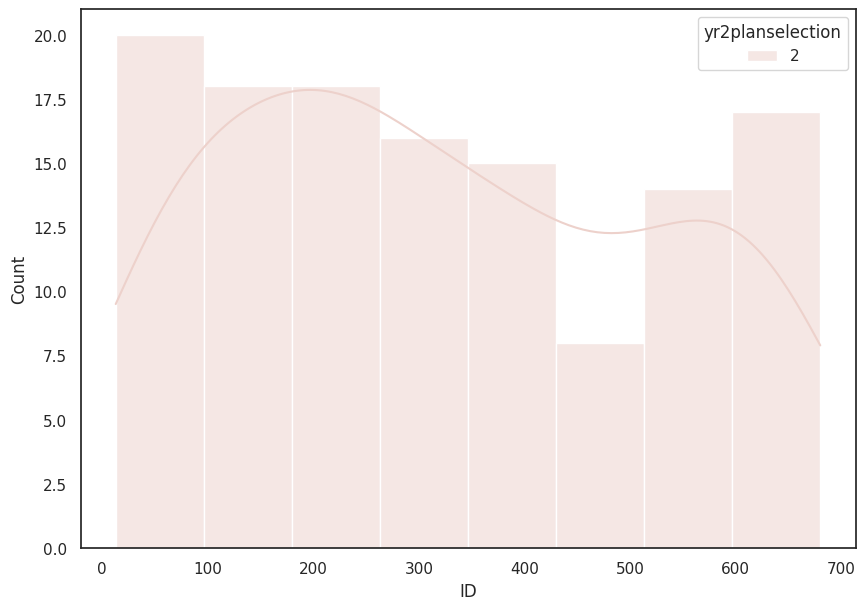

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_b,x='ID',hue="yr2planselection",kde=True,multiple='stack')

<Axes: xlabel='ID', ylabel='Count'>

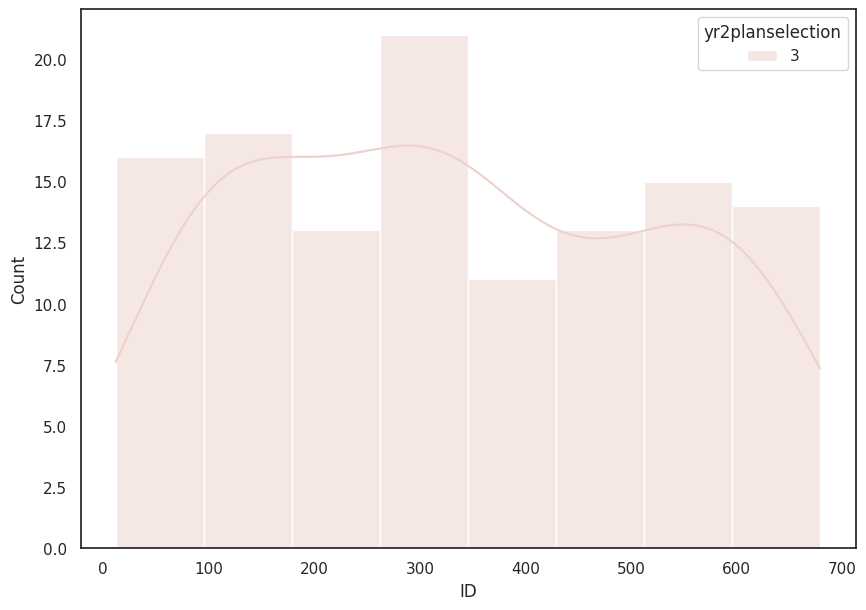

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_c,x='ID',hue="yr2planselection",kde=True,multiple='stack')

<Axes: xlabel='ID', ylabel='Count'>

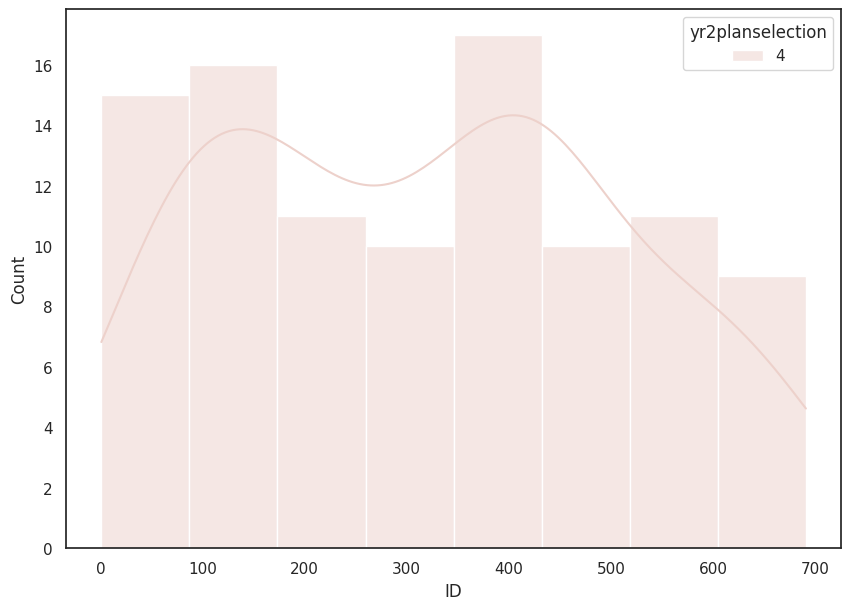

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_d,x='ID',hue="yr2planselection",kde=True,multiple='stack')

<Axes: xlabel='ID', ylabel='Count'>

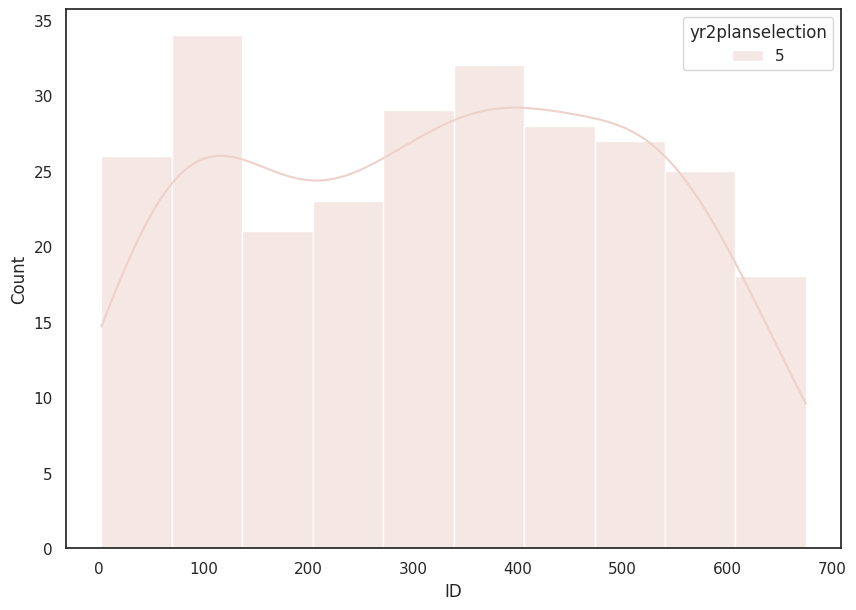

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_e,x='ID',hue="yr2planselection",kde=True,multiple='stack')

<Axes: xlabel='ID', ylabel='Count'>

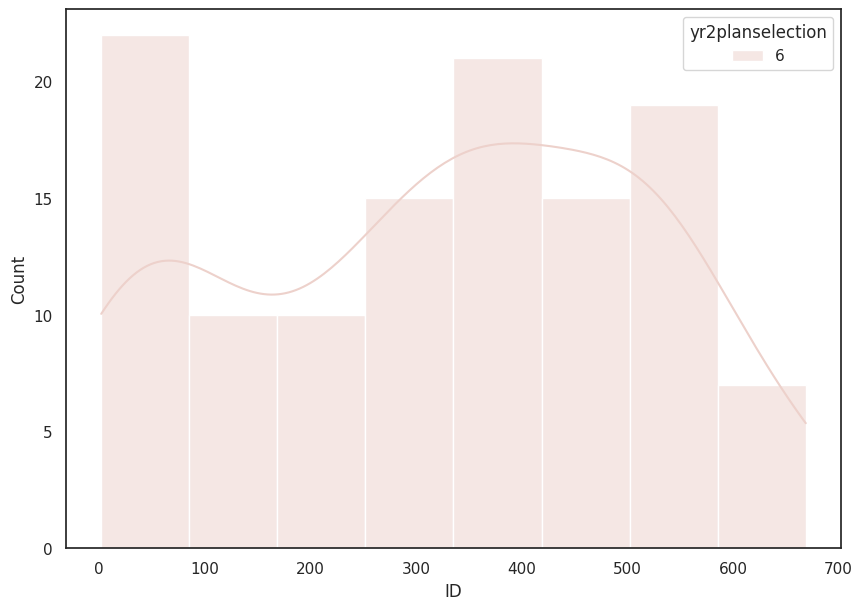

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=plan_f,x='ID',hue="yr2planselection",kde=True,multiple='stack')

<Axes: xlabel='ID', ylabel='Count'>

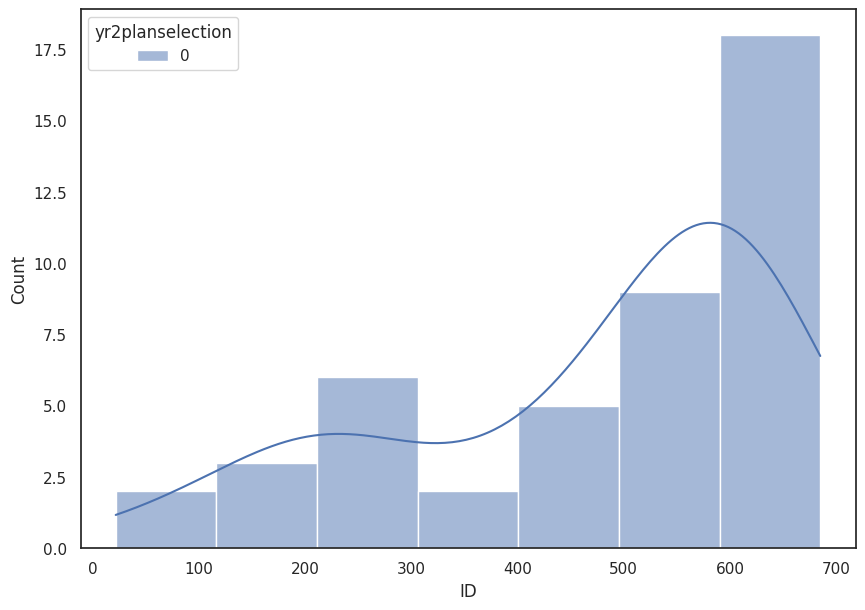

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=no_plan,x='ID',hue="yr2planselection",kde=True,multiple='stack')

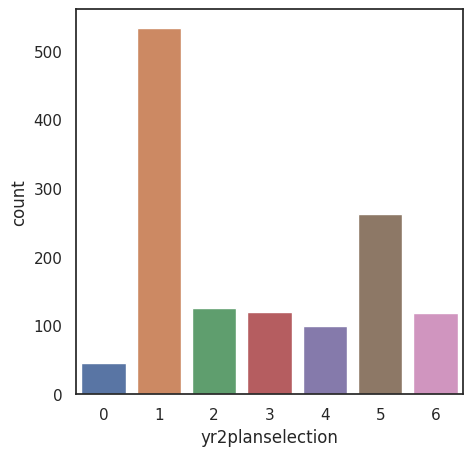

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='yr2planselection', data=data)
plt.show()

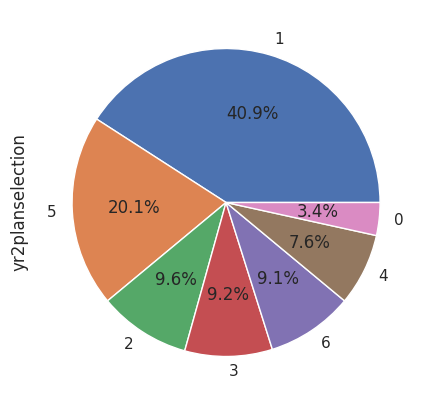

In [ ]:
# Plan offered by the insurance company
data.yr2planselection.value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.show()

In [ ]:
100. * data.yr2planselection.value_counts() / len(data.yr2planselection)

1    40.888208
5    20.137825
2     9.647779
3     9.188361
6     9.111792
4     7.580398
0     3.445636
Name: yr2planselection, dtype: float64

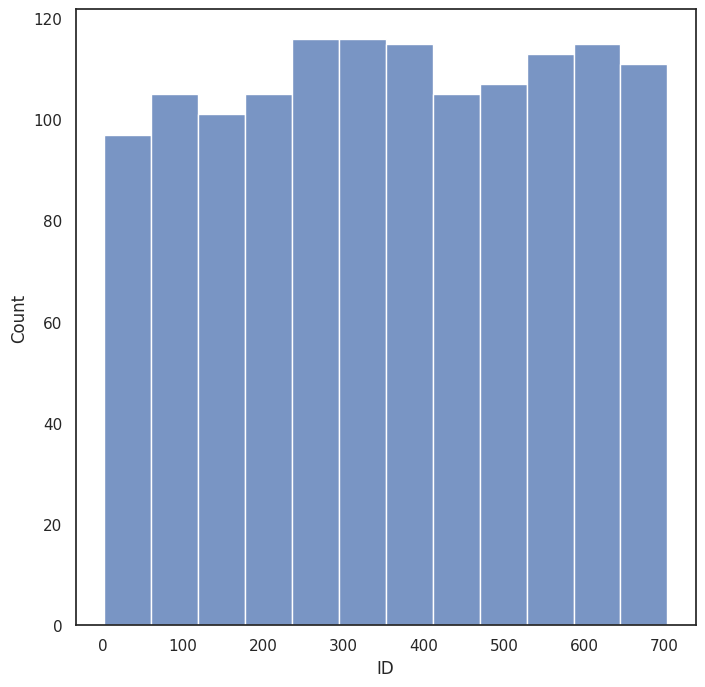

In [ ]:
plt.figure(figsize = (8,8))
sns.histplot(data['ID'])
plt.show()

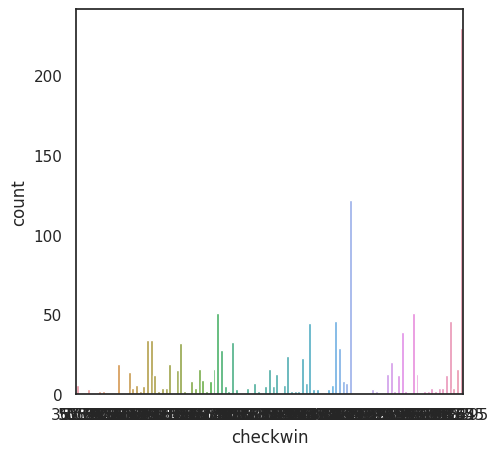

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="checkwin", data=data)
plt.show()

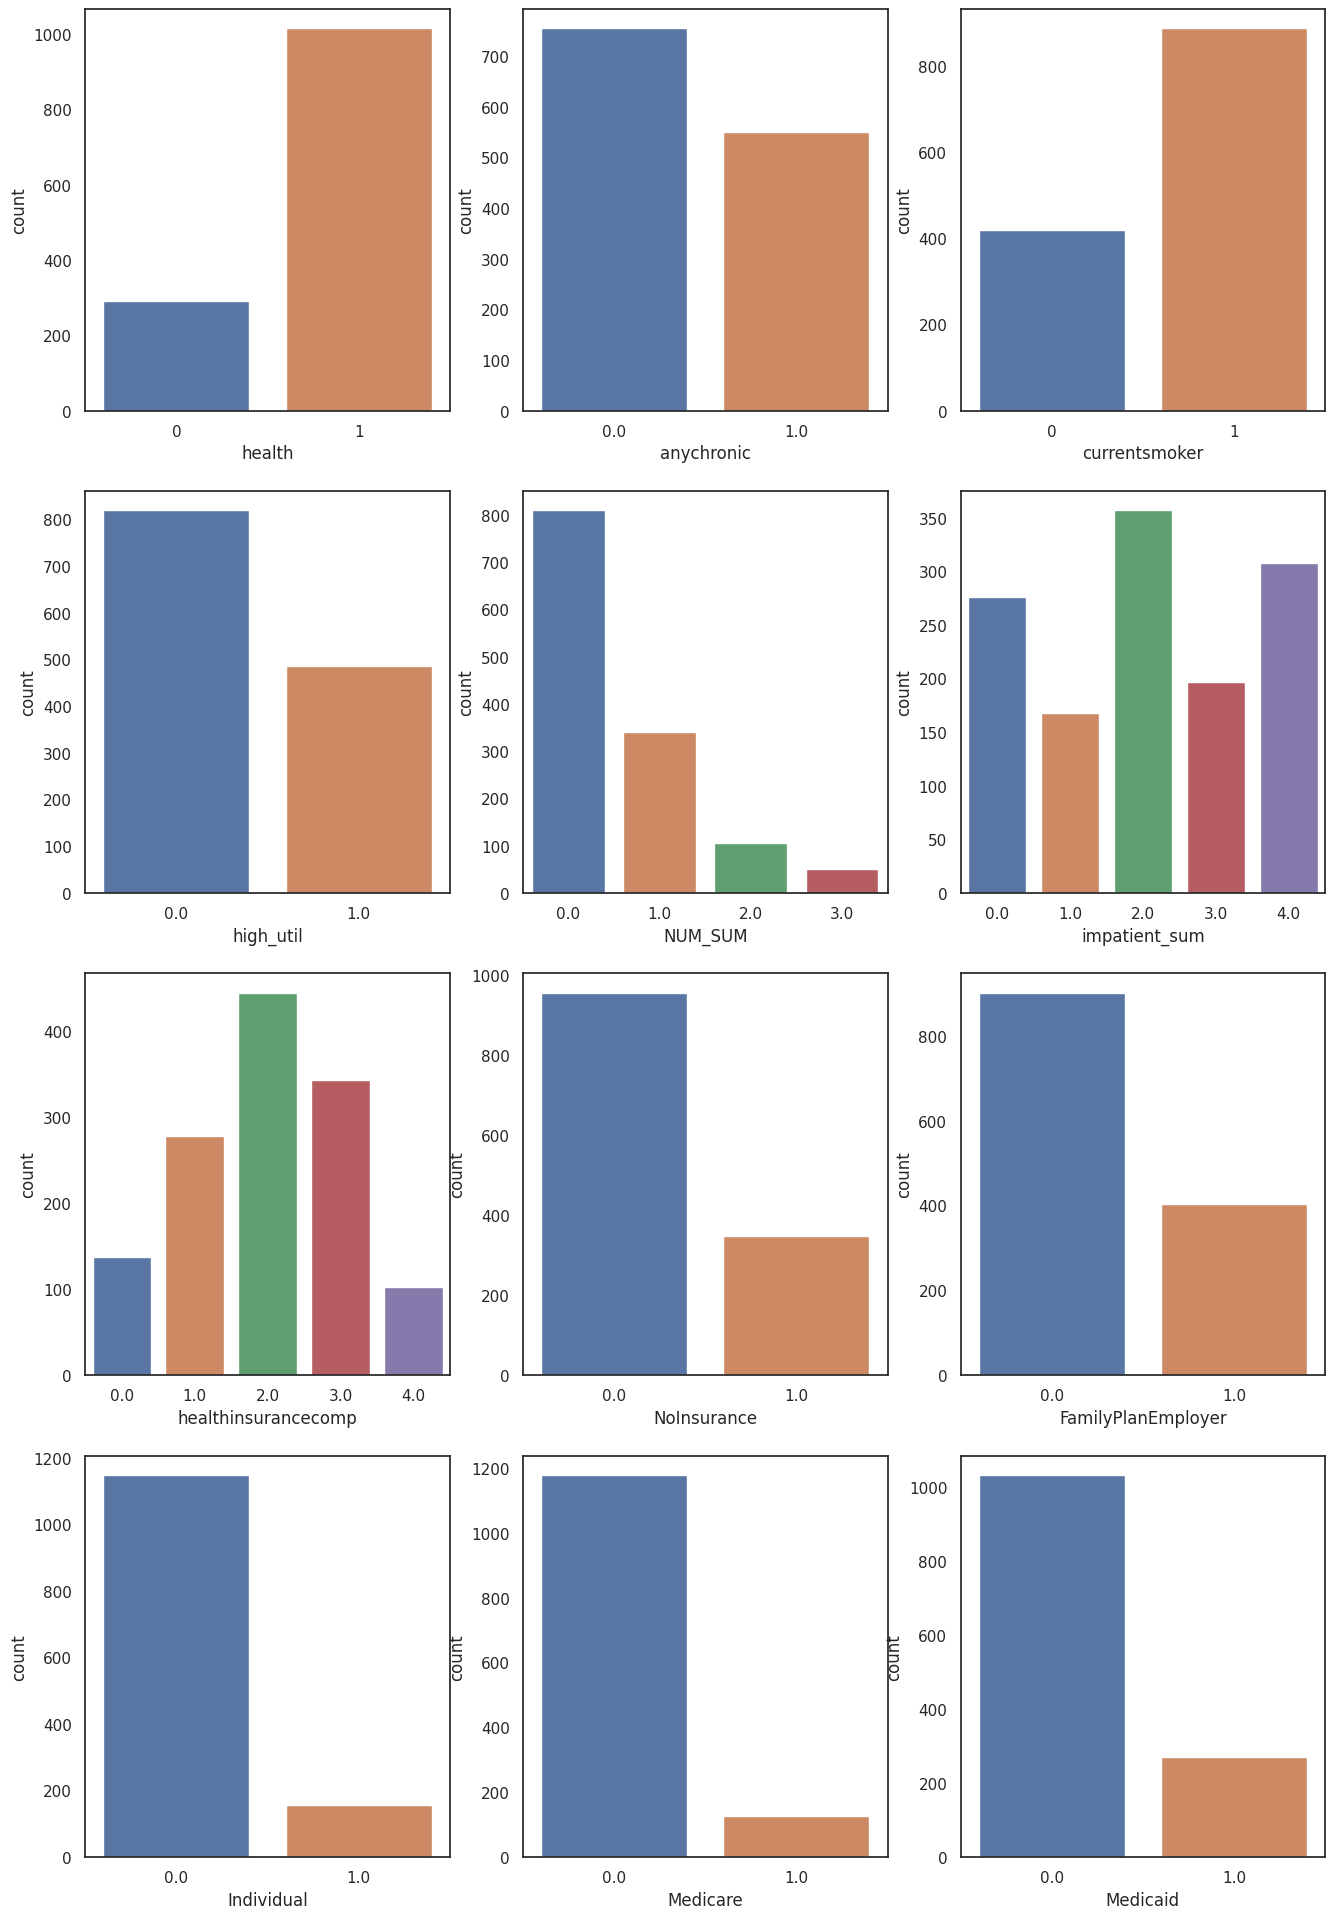

In [ ]:
X=['health', 'anychronic', 'currentsmoker', 'high_util',
       'NUM_SUM', 'impatient_sum', 'healthinsurancecomp', 'NoInsurance',
       'FamilyPlanEmployer', 'Individual', 'Medicare', 'Medicaid',
       'yr1healthstatus',  'yr2healthstatus',
       'yr2planselection', 'yr1winnings', 'yr2winnings', 'losscon', 'nudgecon',
       'nudgecon_det', 'yr1optimal', 'yr2optimal']

fig, ax = plt.subplots(nrows = 4, ncols = 3) # 16 subplots
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(3):
        sns.countplot(x = data[X[3 * i + j]] , ax = ax[i][j]) # count plot

In [ ]:
data.columns

Index(['ID', 'checkwin', 'health', 'anychronic', 'currentsmoker', 'high_util',
       'NUM_SUM', 'impatient_sum', 'gambling_risk', 'investing_risk',
       'health_risk', 'healthinsurancecomp', 'NoInsurance',
       'FamilyPlanEmployer', 'Individual', 'Medicare', 'Medicaid',
       'shop_exchange1', 'yr1healthstatus', 'yr1planselection',
       'yr2healthstatus', 'yr2planselection', 'yr1winnings', 'yr2winnings',
       'yraveragewinnings', 'target', 'nudgecon', 'nudgecon_det', 'yr1optimal',
       'yr2optimal', 'label', 'bin_avg_winnings', 'year2_winnings',
       'year1_winnings', 'checkwin_groups'],
      dtype='object')

### Split Inputs (X), Output (y) and Train the data

1.   List item
2.   List item



In [ ]:
#inputs
X=data[['ID', 'checkwin', 'health', 'anychronic', 'currentsmoker', 'high_util','investing_risk','health_risk','FamilyPlanEmployer', 'Individual', 'Medicare', 'Medicaid','yr1healthstatus',  'yr2healthstatus']]

In [ ]:
#output
y= data['yr2planselection']

In [ ]:
#splite the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)



```
# This is formatted as code
```

### Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class
LR = LogisticRegression()
# fitting the training data
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#y1_prediction
y1_prediction =  LR.predict(X_test)
y1_prediction

array([5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5,
       5, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1,
       1, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 5, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,

In [ ]:
#Logistic Regression Accuracy
lrga=accuracy_score(y_test, y1_prediction)*100
lrga

39.54081632653062

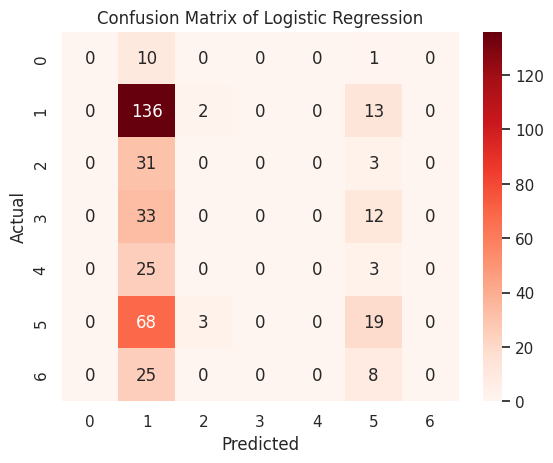

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix_lr = confusion_matrix(y_test, y1_prediction)
sns.heatmap(conf_matrix_lr, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### KNeighbors Classification




In [ ]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred=knn.predict(X_test)

In [ ]:
knn_score=knn.score(X_test,y_test)

In [ ]:
#KNeighbors accuracy
from sklearn.metrics import accuracy_score
knna=accuracy_score(y_test,pred)*100
knna

46.93877551020408

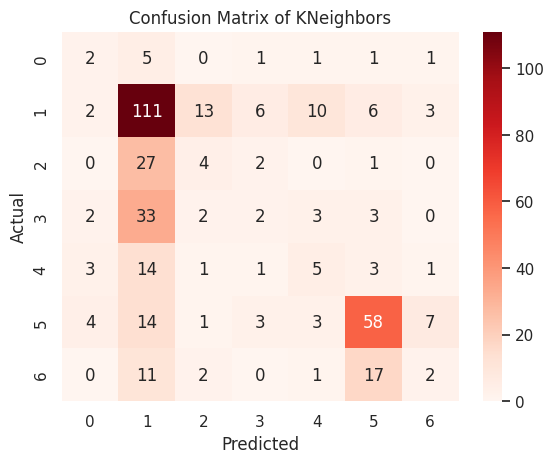

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix_knn, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNeighbors')
plt.show()



###Artificial Neural Network Model

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
accuracy=ann.fit(X_train,y_train,batch_size=64,epochs = 50)

Epoch 1/50
15/15 [==============================] - 3s 8ms/step - loss: -54.4164 - accuracy: 0.4190
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: -71.4968 - accuracy: 0.4190
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: -92.1485 - accuracy: 0.4190
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: -116.4425 - accuracy: 0.4190
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: -145.2462 - accuracy: 0.4190
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: -179.7176 - accuracy: 0.4190
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: -220.2524 - accuracy: 0.4190
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: -267.8002 - accuracy: 0.4190
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: -323.3010 - accuracy: 0.4190
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: -388.7911 - accuracy:

In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
y_pred=y_pred.astype(int)
y_pred

13/13 [==============================] - 0s 3ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
#ANN accuracy
from sklearn.metrics import accuracy_score
anna=accuracy_score(y_test, y_pred)*100
anna

38.52040816326531

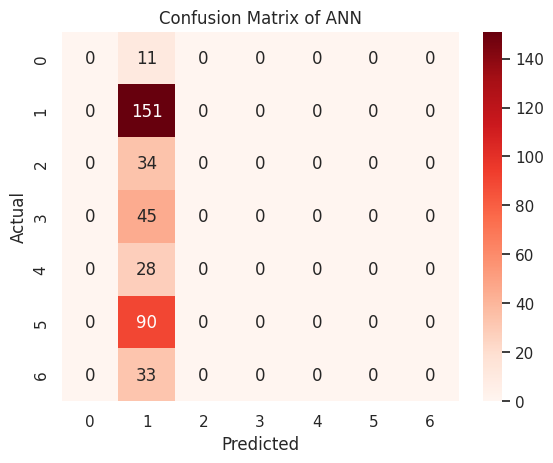

In [ ]:
conf_matrix_ann = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_ann, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of ANN')
plt.show()

###Convolutional Neural Network (CNN)

In [ ]:
#CNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 58s 81ms/step - loss: 1.8323 - accuracy: 0.3150 - val_loss: 1.5076 - val_accuracy: 0.4780
Epoch 2/5
704/704 [==============================] - 58s 82ms/step - loss: 1.5639 - accuracy: 0.4220 - val_loss: 1.3124 - val_accuracy: 0.5418
Epoch 3/5
704/704 [==============================] - 56s 79ms/step - loss: 1.4329 - accuracy: 0.4761 - val_loss: 1.2019 - val_accuracy: 0.5862
Epoch 4/5
704/704 [==============================] - 59s 84ms/step - loss: 1.3496 - accuracy: 0.5096 - val_loss: 1.1264 - val_accuracy: 0.6066
Epoch 5/5
704/704 [==============================] - 58s 82ms/step - loss: 1.2905 - accuracy: 0.5314 - val_loss: 1.0806 - val_accuracy: 0.6270


In [ ]:
y_predd = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 4s 12ms/step


In [ ]:
cnna = accuracy_score(np.argmax(y_test, axis=1), y_predd)*100
cnna

62.31

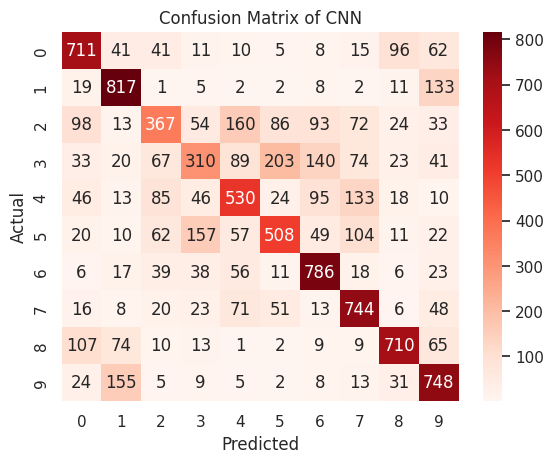

In [ ]:
conf_matrix_cnn = confusion_matrix(np.argmax(y_test, axis=1), y_predd)
sns.heatmap(conf_matrix_cnn, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of CNN')
plt.show()

### XGBoost Model

In [ ]:
!pip install xgboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
xg_cls = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
xg_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_predXgb = xg_cls.predict(X_test)

In [ ]:
Xgbaccuracy = accuracy_score(y_test, y_predXgb)
Xgbaccuracy

0.9387755102040817

In [ ]:
Xgba= Xgbaccuracy*100
Xgba

93.87755102040816

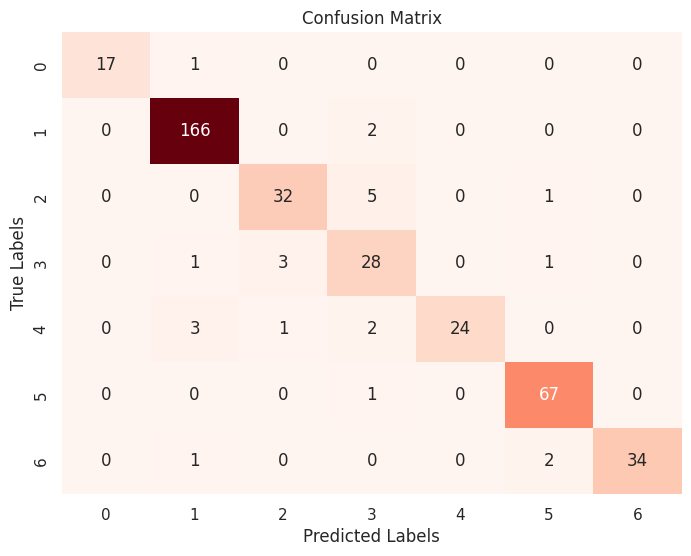

In [ ]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_predXgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###Graph Neural Network (GNN)

In [ ]:
# lets convert all categorical variables to numberical
# drop the target col.
Y = data['target']

data = data.drop(["target"], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

for each_col in data.select_dtypes("object").columns:
    data[each_col] = lbl.fit_transform(data[each_col])

print("Done processing")

Done processing


In [ ]:
# recheck if there is any categorical column
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
# Extract features and target
x = data.drop(columns=['ID'])  # Extract features
y = to_categorical(Y.map({"lose":0, "win":1}))  # Extract target


# convert to scaling
scaler = StandardScaler()

X_x = scaler.fit_transform(x)


# Convert features and target to PyTorch tensors
x = torch.tensor(X_x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)  # Assuming a classification task

# Create an edge index (assuming a fully connected graph)
num_nodes = len(data)
edge_index = torch.tensor([data['ID'].values, data['ID'].values], dtype=torch.int64)
# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

In [ ]:
msk=masking(split="train_rest", num_splits = 1, num_val = 0.2, num_test= 0.2)
g=msk(data)
print(g)
print()
print("training samples",torch.sum(g.train_mask).item())
print("validation samples",torch.sum(g.val_mask ).item())
print("test samples",torch.sum(g.test_mask ).item())

Data(x=[1306, 33], edge_index=[2, 1306], y=[1306, 2], train_mask=[1306], val_mask=[1306], test_mask=[1306])

training samples 784
validation samples 261
test samples 261


In [ ]:
num_of_feat = data.num_features

In [ ]:
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GraphConv(input_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)



    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return self.softmax(x)

In [ ]:
def training_eval_loop(model, data, epochs=15, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model = model.to(device)

    criterion = nn.BCEWithLogitsLoss() #nn.CrossEntropyLoss()


    training_loss = []
    validation_loss = []
    tr_acc = []
    tr_f1 = []
    vl_acc = []
    vl_f1 = []
    pred = []
    lab_preds = []
    model.train()

    for each_epoch in range(epochs):
        curr_loss = 0.0
        #perfom training
        optimizer.zero_grad()
        outputs_preds=model(data)
        #we are calculating loss only based on the training set which its mask is true
        loss = criterion(outputs_preds[g.train_mask],data.y[g.train_mask])

        loss.backward()
        optimizer.step()
        curr_loss += loss.item()

        out_preds = torch.argmax(outputs_preds[g.train_mask], dim=1).detach().cpu().numpy()
        labels = torch.argmax(data.y[g.train_mask], dim=1).cpu().numpy()


        training_loss.append(curr_loss /1)
        f1 = f1_score(labels, out_preds)
        acc = accuracy_score(labels, out_preds)
        tr_acc.append(acc)
        tr_f1.append(f1)



        #perform evaluation loop
        model.eval()
        with torch.no_grad():
            valid_loss = 0.0
            val_output_ = model(data)

            #find validation loss using their masks
            loss = criterion(outputs_preds[g.val_mask],data.y[g.val_mask])

            val_preds = torch.argmax(outputs_preds[g.val_mask], dim=1).detach().cpu().numpy()
            val_labels = torch.argmax(data.y[g.val_mask], dim=1).cpu().numpy()

            valid_loss += loss.item()

            val_f1 = f1_score(val_labels, val_preds)
            val_acc = accuracy_score(val_labels, val_preds)
            validation_loss.append(valid_loss / 1)
            vl_acc.append(val_acc)
            vl_f1.append(val_f1)

        #we print evaluations after every 5 epochs
        if (each_epoch+1) %5==0:
            print(f"Epoch {each_epoch+1}/{epochs} "
                  f"Train Loss: {curr_loss:.4f}  "
                  f"Train F1: {f1:.4f}   "
                  f"Train Acc: {acc:.4f}  "
                  f"Validation Loss: {valid_loss:.4f}  "
                  f"Val F1: {val_f1:.4f}  "
                  f"Val Acc: {acc:.4f}")



    return {
        "train_loss": training_loss,
        "train_f1": tr_f1,
        "train_acc": tr_acc,
        "val_loss": validation_loss,
        "val_f1": vl_f1,
        "val_acc": vl_acc
    }


In [ ]:
# function to get predictions based on inputs

def predict_based_on_model(model,data_inputs):
    #this performs predictions based on the test data only.
    model.eval()
    with torch.no_grad():
        test_output_ = model(data)
        return test_output_[g.test_mask].detach().cpu().numpy(), data_inputs.y[g.test_mask].detach().cpu().numpy().argmax(axis=1)


In [ ]:
criterion = nn.BCEWithLogitsLoss()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = GNNModel(num_of_feat, 32, 2)
history = training_eval_loop(model, g, 20, 0.001)

Epoch 5/20 Train Loss: 0.7167  Train F1: 0.4458   Train Acc: 0.5497  Validation Loss: 0.7146  Val F1: 0.4541  Val Acc: 0.5497
Epoch 10/20 Train Loss: 0.7058  Train F1: 0.5068   Train Acc: 0.5829  Validation Loss: 0.7129  Val F1: 0.5023  Val Acc: 0.5829
Epoch 15/20 Train Loss: 0.6953  Train F1: 0.5569   Train Acc: 0.6224  Validation Loss: 0.7068  Val F1: 0.5625  Val Acc: 0.6224
Epoch 20/20 Train Loss: 0.6852  Train F1: 0.6165   Train Acc: 0.6684  Validation Loss: 0.6990  Val F1: 0.5714  Val Acc: 0.6684


In [ ]:
def plot_training_history(history, model_name):
    """
    plot plot training and validation trends
    """

    metrics = ['loss', 'acc', 'f1']
    titles = ['Loss', 'Accuracy', 'F1 Score']
    ylabels = ['Loss', 'Accuracy', 'F1 Score']
    colors = "bgrcmyk"

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 7))
    x = np.arange(1, len(history['train_loss']) + 1)

    for i, metric in enumerate(metrics):
        train_metric = history[f'train_{metric}']
        val_metric = history[f'val_{metric}']

        ax[i].plot(x, train_metric,f'{colors[i]}o-', label='Training', linewidth=1)
        ax[i].plot(x, val_metric,f'{colors[len(colors)-1-i]}o-', label='Validation', linewidth=1)
        ax[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax[i].set_ylabel(ylabels[i], fontsize=12, fontweight='bold')
        ax[i].set_title(f'Training and Validation {titles[i]}', fontsize=14, fontweight='bold')
        ax[i].legend(fontsize=12)

    plt.suptitle(f"Training and Validation Metrics Trends for Model {model_name}", fontweight='bold', fontsize=17)
    plt.tight_layout()
    plt.show()


# function to plot ROC curve based on the models' results and confussion matrix


LABELS = ['LOSE','WIN']
def analyze_model_performance(labels, preds_proba, model_name):
    # Convert prediction probabilities to labels
    preds = preds_proba.argmax(axis=1)

    # Calculate metrics and confusion matrix
    cf_matrix = confusion_matrix(preds, labels)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    recall = recall_score(labels, preds)
    precision = precision_score(labels, preds)

    # Print performance summary
    print(f"\n\nPERFORMANCE RESULTS SUMMARY FOR {model_name}")
    print("Accuracy Score: {:4f}".format(accuracy))
    print("F1 Score: {:4f}".format(f1))
    print("Recall Score: {:4f}".format(recall))
    print("Precision Score: {:4f}".format(precision))

    print(f"Campaigns Wrongly Predicted as LOSE: {cf_matrix[0][1]}")
    print(f"Campaigns Wrongly Predicted as WIN: {cf_matrix[1][0]}")

    print("\n\n")

    # Create visualization
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Plot Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.set_theme(style='whitegrid', rc={'figure.figsize':(8,6)})
    plt.title(f"Confusion Matrix for {model_name}", fontweight="bold")
    sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt="g", xticklabels=LABELS, yticklabels=LABELS, ax=axs[0], cbar=False)
    plt.ylabel("PREDICTED LABELS", fontweight='bold')
    plt.xlabel("ACTUAL LABELS", fontweight='bold')

    # Plot ROC Curves
    plt.subplot(1, 2, 2)
    skplt.metrics.plot_roc(pd.Series(labels).map({1: "WIN", False: "LOSE"}), preds_proba, figsize=(14, 10), ax=axs[1])
    plt.title(f"ROC CURVES ON PERFORMANCE FOR {model_name}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.show()


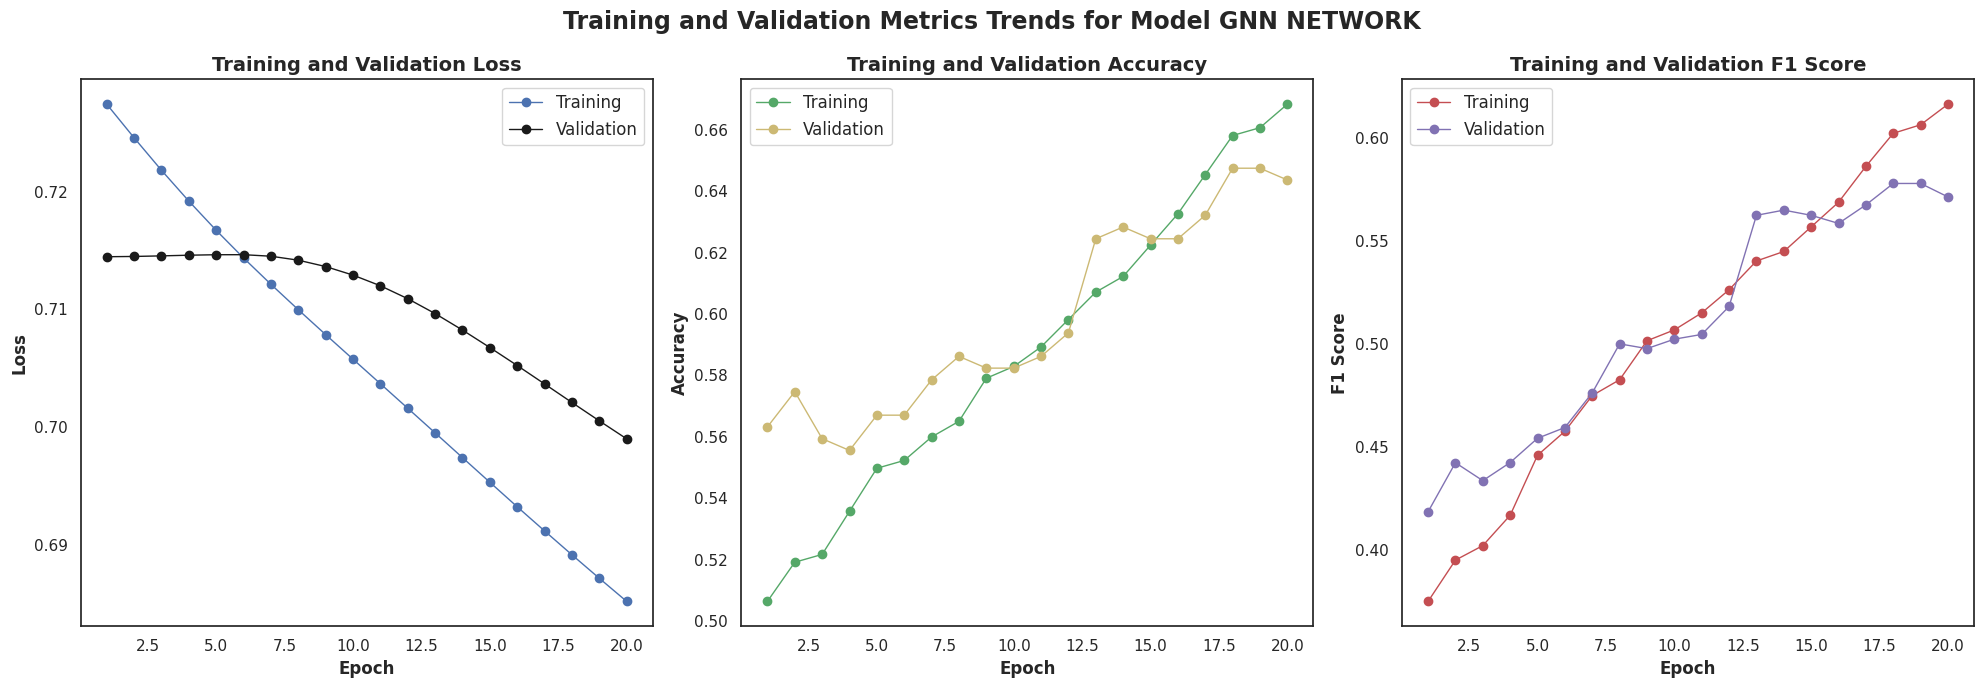

In [ ]:
plot_training_history(history, "GNN NETWORK")

In [ ]:
# get sample predictions
test_probs, actual_labels = predict_based_on_model(model, data)

In [ ]:
accuracy=accuracy_score(test_probs.argmax(1), actual_labels)
accuracy

0.5938697318007663



PERFORMANCE RESULTS SUMMARY FOR GNN Network Model
Accuracy Score: 0.593870
F1 Score: 0.522523
Recall Score: 0.442748
Precision Score: 0.637363
Campaigns Wrongly Predicted as LOSE: 73
Campaigns Wrongly Predicted as WIN: 33





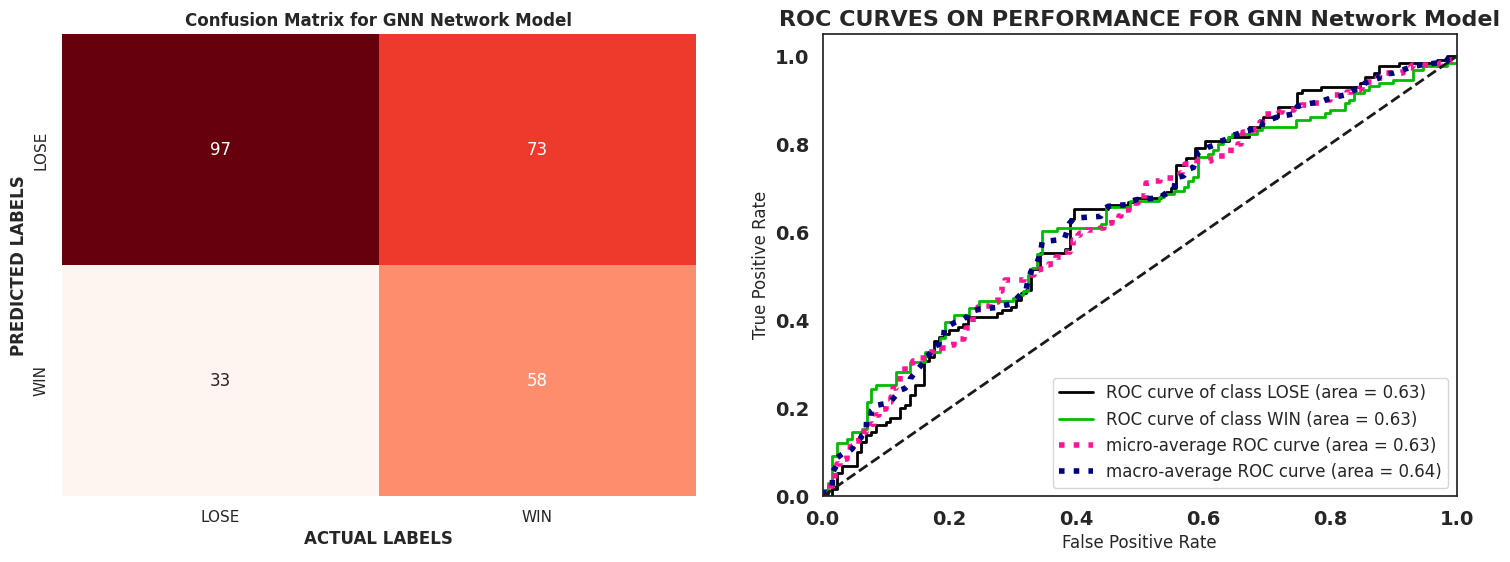

In [ ]:
# plot evaluation results
analyze_model_performance(actual_labels, test_probs, "GNN Network Model")

In [ ]:
# train for longer number of evaluations and evaluate
criterion = nn.BCEWithLogitsLoss()
model_2 = GNNModel(num_of_feat, 32, 2)
history2 = training_eval_loop(model_2, g, 160, 0.001)

Epoch 5/160 Train Loss: 0.7252  Train F1: 0.4074   Train Acc: 0.5102  Validation Loss: 0.7384  Val F1: 0.3654  Val Acc: 0.5102
Epoch 10/160 Train Loss: 0.7136  Train F1: 0.5045   Train Acc: 0.5765  Validation Loss: 0.7384  Val F1: 0.4112  Val Acc: 0.5765
Epoch 15/160 Train Loss: 0.7032  Train F1: 0.5787   Train Acc: 0.6212  Validation Loss: 0.7349  Val F1: 0.4356  Val Acc: 0.6212
Epoch 20/160 Train Loss: 0.6934  Train F1: 0.6446   Train Acc: 0.6709  Validation Loss: 0.7286  Val F1: 0.4701  Val Acc: 0.6709
Epoch 25/160 Train Loss: 0.6839  Train F1: 0.6757   Train Acc: 0.6939  Validation Loss: 0.7209  Val F1: 0.5299  Val Acc: 0.6939
Epoch 30/160 Train Loss: 0.6744  Train F1: 0.7244   Train Acc: 0.7360  Validation Loss: 0.7125  Val F1: 0.5617  Val Acc: 0.7360
Epoch 35/160 Train Loss: 0.6648  Train F1: 0.7533   Train Acc: 0.7628  Validation Loss: 0.7027  Val F1: 0.6050  Val Acc: 0.7628
Epoch 40/160 Train Loss: 0.6550  Train F1: 0.7906   Train Acc: 0.7959  Validation Loss: 0.6925  Val F1: 0

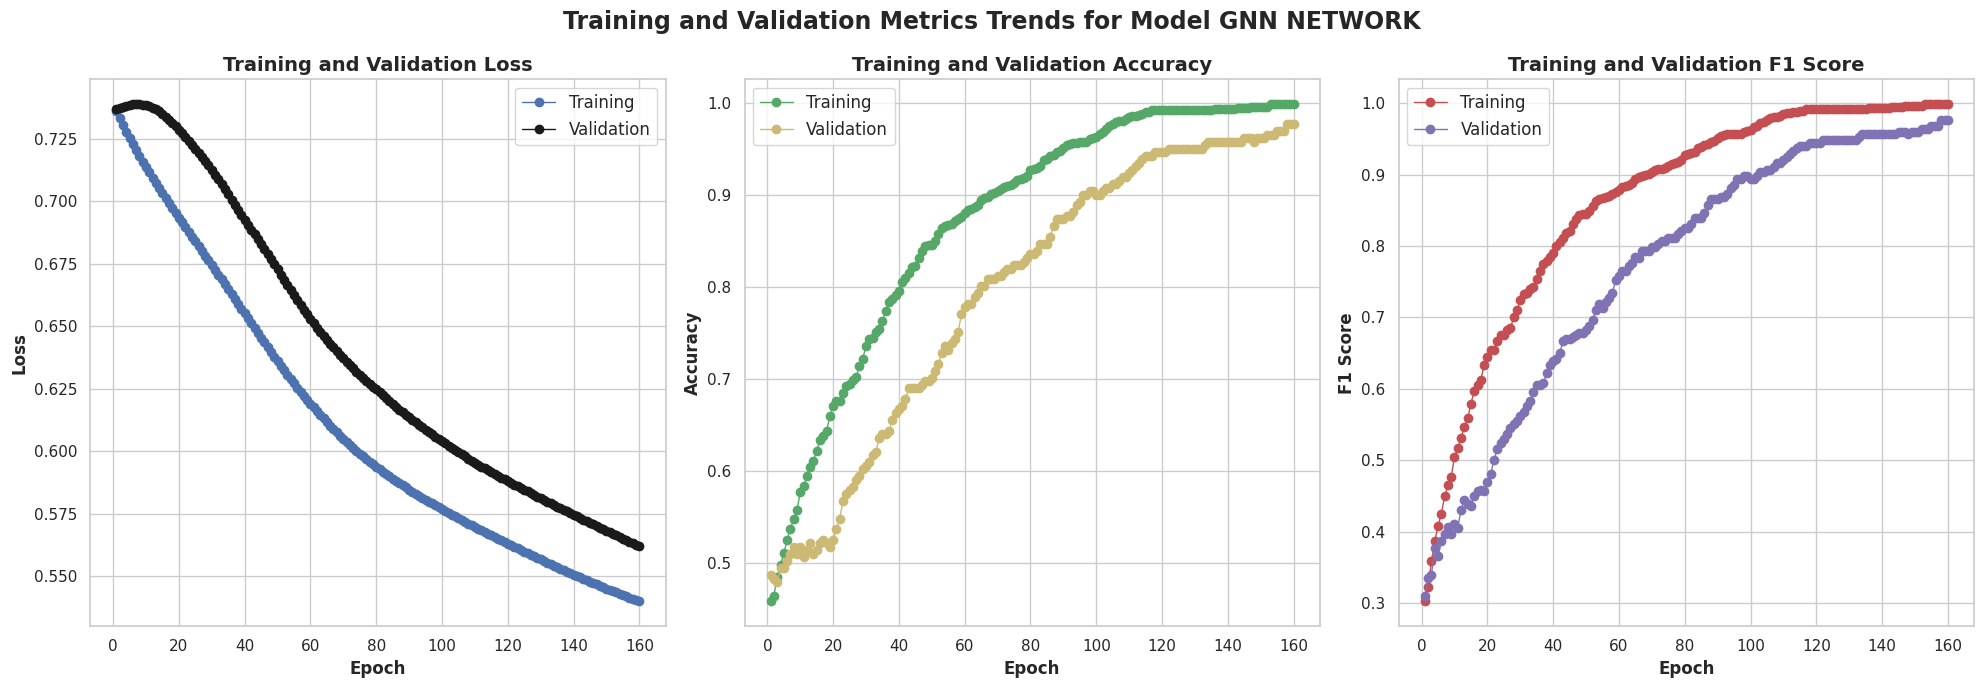

In [ ]:
plot_training_history(history2, "GNN NETWORK")



PERFORMANCE RESULTS SUMMARY FOR GNN Network Model (160 EPOCHS)
Accuracy Score: 0.988506
F1 Score: 0.988506
Recall Score: 0.984733
Precision Score: 0.992308
Campaigns Wrongly Predicted as LOSE: 2
Campaigns Wrongly Predicted as WIN: 1





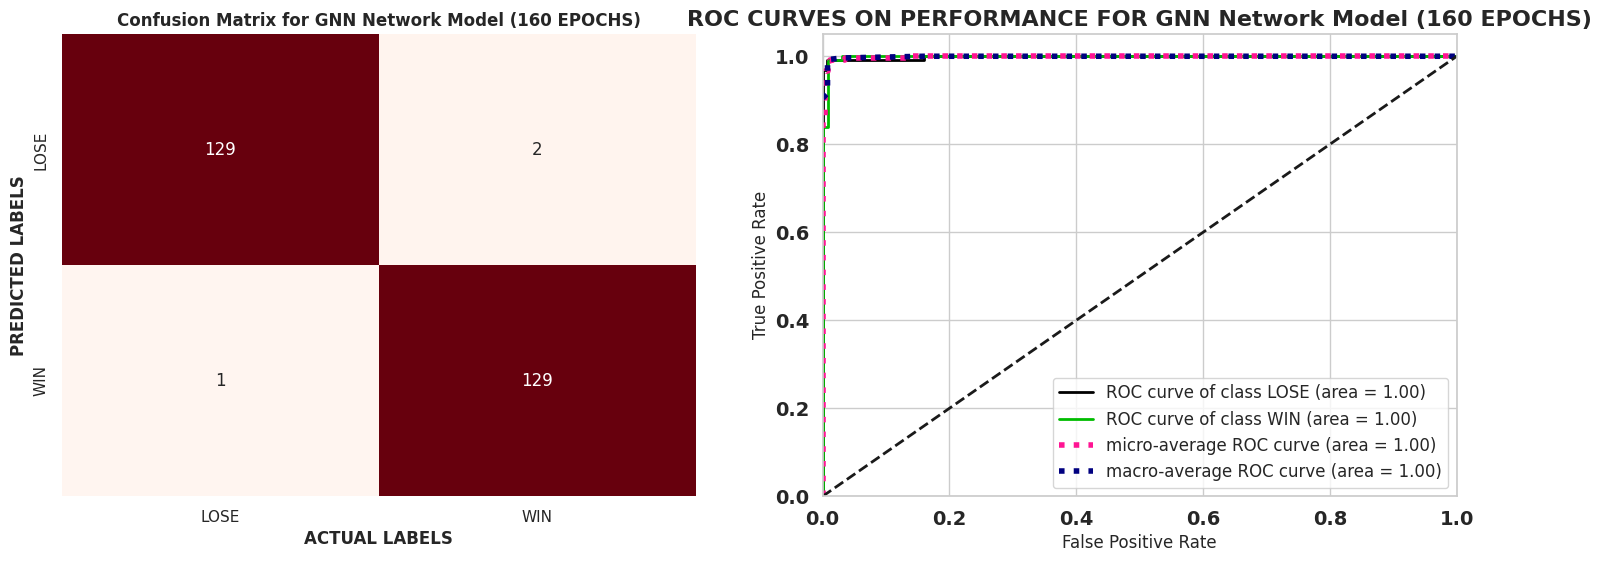

In [ ]:
test_probs1, actual_labels1 = predict_based_on_model(model_2, data)
# plot evaluation results
analyze_model_performance(actual_labels1, test_probs1, "GNN Network Model (160 EPOCHS)")

In [ ]:
accuracy=accuracy_score(test_probs1.argmax(1), actual_labels1)
accuracy

0.9885057471264368

In [ ]:
gnna=accuracy*100
gnna

98.85057471264368

###Comparisons

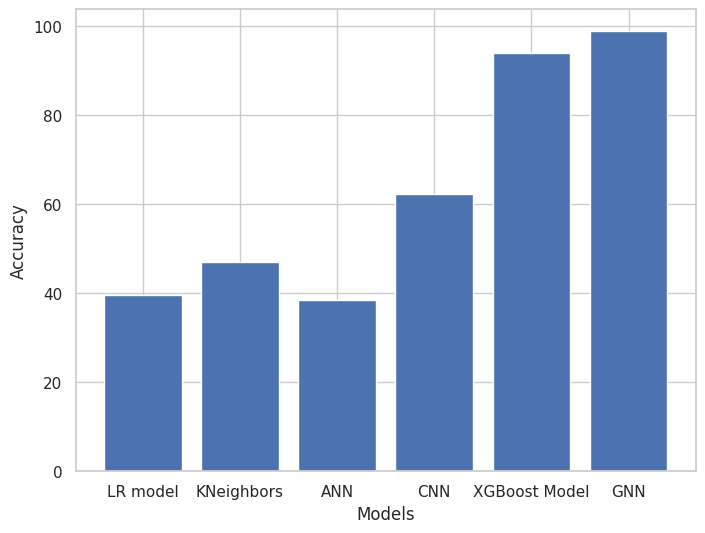

In [ ]:
#showing as figure of all 6 models accuracy as bar
import matplotlib.pyplot as plt
fig = plt.figure()
models = ['LR model','KNeighbors','ANN','CNN','XGBoost Model','GNN']
plt.ylabel('Accuracy',)
plt.xlabel('Models')
accuracy = [lrga,knna,anna,cnna,Xgba,gnna]
plt.bar(models,accuracy)
plt.show()

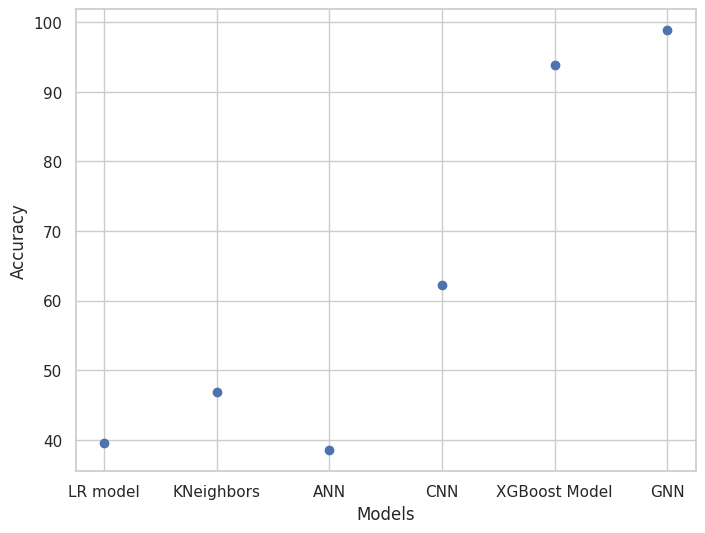

In [ ]:
#showing as figure of all 6 models accuracy as scatter plot
import matplotlib.pyplot as plt
fig = plt.figure()
models = ['LR model','KNeighbors','ANN','CNN','XGBoost Model','GNN']
plt.ylabel('Accuracy',)
plt.xlabel('Models')
accuracy = [lrga,knna,anna,cnna,Xgba,gnna]
plt.scatter(models,accuracy)
plt.show()